In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
lowrankdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top10/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{lowrankdir}/{sub}_task-resttop10_fc.npy')
        n = np.load(f'{lowrankdir}/{sub}_task-nbacktop10_fc.npy')
        e = np.load(f'{lowrankdir}/{sub}_task-emoidtop10_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


In [78]:
# Get summary measures

netbounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 265]

def relbounds(mats, subi, r1a, r1b, r2a, r2b, sum=np.mean):
    mat = mats[subi]
    a = sum(mat[netbounds[r1a]:netbounds[r1a+1],netbounds[r1b]:netbounds[r1b+1]])
    b = sum(mat[netbounds[r2a]:netbounds[r2a+1],netbounds[r2b]:netbounds[r2b+1]])
    return a/b

def absbounds(mats, subi, r1, r2, one_minus_eye, sum=np.mean):
    mat = mats[subi] * one_minus_eye
    s = sum(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return s

def varbounds(mats, subi, r1, r2, var=np.var):
    mat = mats[subi]
    v = var(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return v

def varbound(mats, subi, var=np.var):
    mat = mats[subi]
    v = var(mat)
    return v

print(absbounds(restmat, 6, 4, 4))
print(varbounds(restmat, 6, 4, 4))
print(relbounds(restmat, 6, 0, 4, 4, 4))
print(varbound(restmat, 6))

TypeError: absbounds() missing 1 required positional argument: 'one_minus_eye'

In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import itertools
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.fc1 = nn.Linear(34716, 20).float().cuda()
        self.fc2 = nn.Linear(20,1).float().cuda()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x).squeeze()
        x = torch.stack([-x, x], dim=1)
        return x

d = D()
d.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/Work/Imputation/disc7.torch'))

one_minus_eye = np.ones((264,264))-np.eye(264)
one_minus_eye2 = (torch.ones(264,264)-torch.eye(264)).float().cuda()

class FC(nn.Module):
    def __init__(self, n):
        super(FC, self).__init__()
        self.x = nn.Parameter(0.1*torch.randn(n,264,10).float().cuda())

    def getfc(self, fake=None):
        if fake is None:
            x = torch.einsum('nai,nbi->nab', self.x, self.x)
        else:
            x = torch.from_numpy(fake).tile(len(self.x), 1, 1).float().cuda()
        return x

    def getvecfc(self, x):
        a,b = torch.triu_indices(264,264,offset=1)
        return x[:,a,b]

    def getfcnp(self):
        with torch.no_grad():
            x = self.getfc()
        x = x.detach().cpu().numpy()
        m = np.max(np.abs(x))
        if m > 1:
            return x/m
        return x

    def forward(self, ab, ab_tgts, fake_tgt, fake=None):
        x = self.getfc(fake)
        x[torch.isnan(x)] = 0.01
        y = self.getvecfc(x)
        loss = 0
        fake = d(y)
        loss += 1*rmse(fake_tgt, fake[:,1])
        for i in range(len(x)):
            for b, tgt in zip(ab, ab_tgts):
                r1, r2 = b
                v = absbounds(x, i, r1, r2, one_minus_eye2, sum=torch.mean)
                loss += rmse(v, tgt)
        return loss

for subi in range(6,7):
    mat = restmat
    
    fc = FC(5)
    optim = torch.optim.Adam(fc.parameters(), lr=5e-3)
    
    nepochs = 300
    pperiod = 50
    
    ab = []
    for i in range(0,14):
        for j in range(i,14):
            ab.append((i,j))
    
    ab_tgts = [absbounds(mat, subi, r1, r2, one_minus_eye) for r1, r2 in ab]

    fake_tgt = -1
    
    for e in range(nepochs):
        optim.zero_grad()
        loss = fc(ab, ab_tgts, fake_tgt)
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')

    print(f'Done {subi}')


0 255.5079345703125
50 23.314224243164062
100 16.30755615234375
150 6.7628912925720215
200 3.232900381088257
250 2.282005548477173
299 1.960993766784668
Done 6


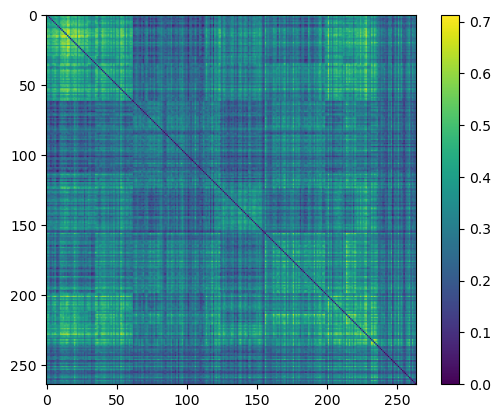

In [158]:
import matplotlib.pyplot as plt

one_minus_eye = np.ones((264,264))-np.eye(264)

plt.imshow(fc.getfcnp()[4]*one_minus_eye)
# plt.imshow(restmat[6])
plt.colorbar()
plt.show()

In [161]:
id1, id2 = np.triu_indices(264, 1)
rmse(fc.getfcnp()[3][id1,id2], rest[6], mean=np.mean)

0.31042725578632835

In [149]:
id1, id2 = np.triu_indices(264, 1)
rmse(rest[6], nback[6], mean=np.mean)

0.4268458573247972